In [1]:
import numpy as np
import matplotlib.pyplot as plt

https://lectures.quantecon.org/

# Part 1: Intro to Python

## Python Essentials

### Exercise 2

## Numpy

### Exercise 1

In [19]:
def p(x, coeff):
#     x_pot = np.array([x**n for n in range(0,len(coeff))])
    x_arr = np.ones(len(coeff))
    x_arr[1:] = x
    x_pot = np.cumprod(x_arr)
    return x_pot @ np.array(coeff)

print(p(1,[1,1,1]), np.poly1d([1,1,1])(1))

3 3


### Exercise 2
q is a discrete probability distribution: $P(x=i) = q_i, i \in N_0$
sample(q) gives a random x from q

speed this up with numpy:

In [24]:
from random import uniform

def sample(q):
    a = 0.0
    U = uniform(0, 1)
    for i in range(len(q)):
        if a < U <= a + q[i]:
            return i
        a = a + q[i]

sample()

In [117]:
def np_sample(q):
    U = uniform(0, 1)
    I = np.cumsum(q)
    return np.searchsorted(I, U)

q = [1/4, 1/2, 3/4]
np_sample(q)

0.7077494896222583


1

In [162]:
class discreteRV():
    
    def __init__(self, q):
        self.q = q
    
    def draw(self, k):
        U = np.random.rand(k)
        I = np.cumsum(q)
        return np.searchsorted(I, U)

q_dist = discreteRV(q)
q_dist.draw(4)

[ 0.61765367  0.11227246  0.35952686  0.10584692]


array([1, 0, 1, 0])

### Exercise 3

0.493


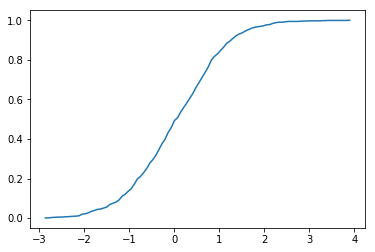

In [245]:
from random import uniform
import matplotlib.pyplot as plt

class ECDF():
    """implements the empirical cumulative distribution function"""
    def __init__(self, observations):
        self.observations = np.asarray(observations)
        
    def __call__(self, x):
#         return len(self.observations[self.observations <= x]) / len(self.observations)
        return np.mean(self.observations <= x)
        
    def plot(self, a=None, b=None, k=100):
        if a is None:
            a = self.observations.min()
        if b is None:
            b = self.observations.max()
        
        self._call_vec = np.vectorize(self.__call__)
        x = np.linspace(a, b, k)
        y = self._call_vec(x)
        plt.plot(x, y)
        plt.show()

obs = np.random.randn(1000)
F = ECDF(obs)
print(F(0))
F.plot()

## Scipy

### Exercise 1

In [5]:
from scipy import stats

In [14]:
def bisect(f, a, b, tol=10e-5):
    """implements recursive root finding with bisection. f(a) < 0 < f(b)"""
    mid = .5 * (b+a)
    if b-a > tol:
        if f(mid) > 0:
            return bisect(f, a, mid)
        else:
            return bisect(f, mid, b)
    else:
        return mid

In [13]:
f = lambda x: np.sin(4 * (x - 0.25)) + x + x**20 - 1

bisect(f, 0, 1)


0.40869140625

## Object Oriented Programming

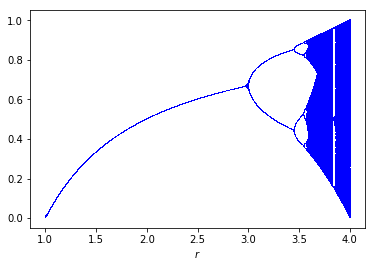

In [122]:
class Chaos:
    """logistic problem, chaos parameter r"""
    def __init__(self, x0, r):
        self.x, self.r = x0, r
        
    def __call__(self):
        """instance of class can be called as function"""
        pass
        
    def __len__(self):
        """so we can call len(instance)"""
        pass
    
    def update(self):
        self.x = self.r * self.x * (1. - self.x)
        return self.x
        
    def series(self, n):
        traj = [self.x]
        for i in range(n):
            traj.append(self.update())
        return traj

# plot steady state values of trajectory for each r:
fig, ax = plt.subplots()
for r in np.arange(1, 4, .001):
    c = Chaos(0.5, r)
    traj = c.series(1000)[100:]
    ax.plot([c.r]*len(traj), traj, 'b,')
ax.set_xlabel('$r$')
plt.show()

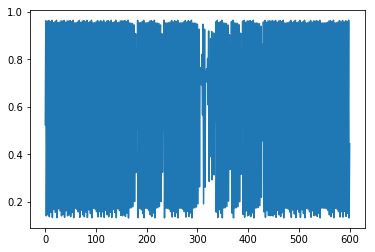

In [113]:
c = Chaos(0.5, 3.857)
plt.plot(c.series(1000)[400:])
plt.show()

In [164]:
vars(np)

{'ALLOW_THREADS': 1,
 'AxisError': numpy.core._internal.AxisError,
 'BUFSIZE': 8192,
 'CLIP': 0,
 'ComplexWarning': numpy.core.numeric.ComplexWarning,
 'DataSource': numpy.lib._datasource.DataSource,
 'ERR_CALL': 3,
 'ERR_DEFAULT': 521,
 'ERR_IGNORE': 0,
 'ERR_LOG': 5,
 'ERR_PRINT': 4,
 'ERR_RAISE': 2,
 'ERR_WARN': 1,
 'FLOATING_POINT_SUPPORT': 1,
 'FPE_DIVIDEBYZERO': 1,
 'FPE_INVALID': 8,
 'FPE_OVERFLOW': 2,
 'FPE_UNDERFLOW': 4,
 'False_': False,
 'Inf': inf,
 'Infinity': inf,
 'MAXDIMS': 32,
 'MAY_SHARE_BOUNDS': 0,
 'MAY_SHARE_EXACT': -1,
 'MachAr': numpy.core.machar.MachAr,
 'ModuleDeprecationWarning': numpy._globals.ModuleDeprecationWarning,
 'NAN': nan,
 'NINF': -inf,
 'NZERO': -0.0,
 'NaN': nan,
 'PINF': inf,
 'PZERO': 0.0,
 'PackageLoader': numpy._import_tools.PackageLoader,
 'RAISE': 2,
 'RankWarning': numpy.lib.polynomial.RankWarning,
 'SHIFT_DIVIDEBYZERO': 0,
 'SHIFT_INVALID': 9,
 'SHIFT_OVERFLOW': 3,
 'SHIFT_UNDERFLOW': 6,
 'ScalarType': (int,
  float,
  complex,
  int,
  bo

In [165]:
dir(np)

['ALLOW_THREADS',
 'AxisError',
 'BUFSIZE',
 'CLIP',
 'ComplexWarning',
 'DataSource',
 'ERR_CALL',
 'ERR_DEFAULT',
 'ERR_IGNORE',
 'ERR_LOG',
 'ERR_PRINT',
 'ERR_RAISE',
 'ERR_WARN',
 'FLOATING_POINT_SUPPORT',
 'FPE_DIVIDEBYZERO',
 'FPE_INVALID',
 'FPE_OVERFLOW',
 'FPE_UNDERFLOW',
 'False_',
 'Inf',
 'Infinity',
 'MAXDIMS',
 'MAY_SHARE_BOUNDS',
 'MAY_SHARE_EXACT',
 'MachAr',
 'ModuleDeprecationWarning',
 'NAN',
 'NINF',
 'NZERO',
 'NaN',
 'PINF',
 'PZERO',
 'PackageLoader',
 'RAISE',
 'RankWarning',
 'SHIFT_DIVIDEBYZERO',
 'SHIFT_INVALID',
 'SHIFT_OVERFLOW',
 'SHIFT_UNDERFLOW',
 'ScalarType',
 'Tester',
 'TooHardError',
 'True_',
 'UFUNC_BUFSIZE_DEFAULT',
 'UFUNC_PYVALS_NAME',
 'VisibleDeprecationWarning',
 'WRAP',
 '_NoValue',
 '__NUMPY_SETUP__',
 '__all__',
 '__builtins__',
 '__cached__',
 '__config__',
 '__doc__',
 '__file__',
 '__git_revision__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_distributor_init',
 '_globals',
 '_import_tools

In [132]:
c.__dict__

In [1]:
vars()

{'In': ['', 'vars()'],
 'Out': {},
 '_': '',
 '__': '',
 '___': '',
 '__builtin__': <module 'builtins' (built-in)>,
 '__builtins__': <module 'builtins' (built-in)>,
 '__doc__': 'Automatically created module for IPython interactive environment',
 '__loader__': None,
 '__name__': '__main__',
 '__package__': None,
 '__spec__': None,
 '_dh': ['/Users/markuskrecik/git/cyberdynecollective/markus/quantecon'],
 '_i': '',
 '_i1': 'vars()',
 '_ih': ['', 'vars()'],
 '_ii': '',
 '_iii': '',
 '_oh': {},
 'exit': <IPython.core.autocall.ZMQExitAutocall at 0x104423198>,
 'get_ipython': <bound method InteractiveShell.get_ipython of <ipykernel.zmqshell.ZMQInteractiveShell object at 0x1041d1278>>,
 'quit': <IPython.core.autocall.ZMQExitAutocall at 0x104423198>}

In [2]:
%whos

Interactive namespace is empty.


### Excercise 2

In [155]:
class Polynomial:
    
    def __init__(self, coeff):
        self.coeff = coeff
        
    def __call__(self, x):
        x_arr = np.ones(len(self.coeff))
        x_arr[1:] = x
        x_arr = np.cumprod(x_arr)
        return np.sum(x_arr * self.coeff)
        
    def D(self):
        """differentiate"""
        self.coeff = [ k*pk for k, pk in enumerate(self.coeff)]
        del self.coeff[0]

In [159]:
p = Polynomial([0,0,1])
p(1)
p.D()
p(1)

2.0

## Advanced Features
### Excercise 1

In [21]:
def fib(t):
    assert t >= 0, "Only defined for positive t"
    
    if t > 1:
        return fib(t-1) + fib(t-2)
    elif t == 1:
        return 1
    else:
        return 0

fib(10)

55

### Excercise 2

In [44]:
def column_iterator(target_file, column_number):
    """A generator function for CSV files.
    When called with a file name target_file (string) and column number
    column_number (integer), the generator function returns a generator
    that steps through the elements of column column_number in file
    target_file.
    """
    f = open('test_table.csv')
    for line in f:
        yield line.split(',')[column_number-1]
    f.close(f)

dates = column_iterator('test_table.csv', 1)

i = 0
for date in dates:
    i += 1
    if i == 10:
        break
    print(date)

Date
2009-05-21
2009-05-20
2009-05-19
2009-05-18
2009-05-15
2009-05-14
2009-05-13
2009-05-12


### Excercise 3

In [51]:
f = open('numbers.txt')
x = 0
for line in f:
    try:
        x += float(line)
    except ValueError:
        pass
f.close()
print(x)

39.0
